<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/KernelRidge_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

(50,) (50,)


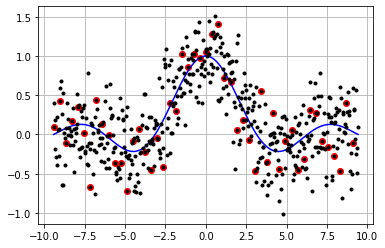

In [2]:
N = 500
x = np.linspace(-3*np.pi,3*np.pi,N)
y = np.sinc(x/np.pi)
var=0.1
noise = np.sqrt(var)*np.random.randn(x.shape[0])
yn = y + noise

x_support = x[::10]
y_support = yn[::10]
print(x_support.shape, y_support.shape)

plt.plot(x_support, y_support, 'ro', label='Support')
plt.plot(x, y, 'b', label='Target')
plt.plot(x, yn, 'k.', label='Noised')
plt.grid()


In [3]:
# Funcion de perdida a derivar
def l(w,X,y,lam=1e-3):
    e = y-tf.linalg.matmul(X,w)
    return tf.linalg.matmul(e,e,transpose_a=True)+  lam*tf.linalg.matmul(we_tf,we_tf,transpose_a=True)    

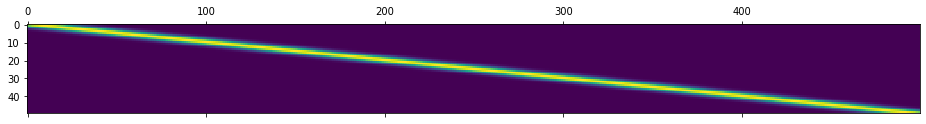

In [4]:
# Pasar datos a tensores
Xdata = tf.convert_to_tensor(x.reshape((-1,1)),dtype=tf.float32)
Xdata_tf_support = tf.convert_to_tensor(x_support.reshape((-1,1)), dtype=tf.float32)
yn_tf = tf.convert_to_tensor(yn, dtype=tf.float32)
we_tf = tf.Variable(tf.random.normal((Xdata_tf_support.shape[0], 1),dtype=tf.float32))

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.5)
k = kernel.matrix(x_support.reshape((-1,1)), x.reshape((-1,1)))

plt.matshow(k)

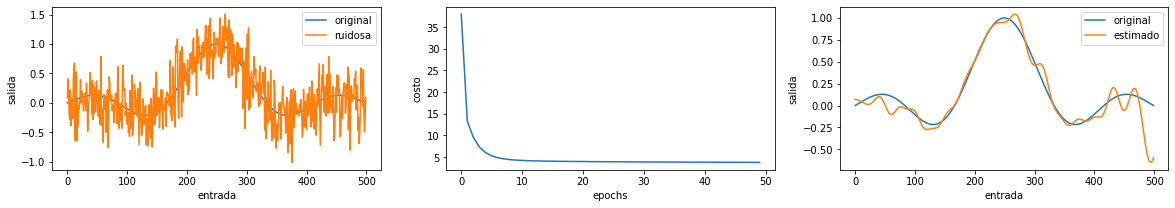

In [5]:
lr = tf.constant(1e-2,dtype=tf.float32)   # Learning rate
lamb = tf.constant(1e-2,dtype=tf.float32) # Hyperparametro regularizacion

# Training
epochs = 50
batch_size = 32
loss = np.zeros((epochs))
wM = np.zeros((epochs,we_tf.shape[0]))
 
Niter = int(Xdata.shape[0]/batch_size)   # N iter por epoch
for epoch in range(epochs):              # Epochs
  for i in range(1,Niter+1):             # Iterar por bathces en epoch

    Xbatch = Xdata[(i-1)*batch_size:i*batch_size,:]
    Xbatch_tf = tf.convert_to_tensor(Xbatch,dtype=tf.float32)
    
    kbatch_tf = kernel.matrix(Xbatch_tf, Xdata_tf_support)
    
    ynbatch = yn[(i-1)*batch_size:i*batch_size]
    ynbatch_tf = tf.convert_to_tensor(ynbatch,dtype=tf.float32)
    
    # Crear contexto gradient tape para guardar cada operacion que envuelve una variable
    with tf.GradientTape() as tape: 
      # Funcion de perdida (loss) para salvar memoria colocar la menor cantidad de codigo en el tape
      z = l(we_tf,kbatch_tf,tf.reshape(ynbatch_tf,(-1,1))) 

    # tape calcula  los gradientes del resultado z con respecto a [w1,w2]
    gradients = tape.gradient(z,[we_tf]) 
    we_tf.assign_sub(lr*gradients[0])
    
  wM[epoch] = we_tf.numpy().reshape(1,-1)
  loss[epoch] = z
  
we = we_tf.numpy()    

plt.figure(figsize=(20,3))

plt.subplot(131)
plt.plot(y, label = 'original')
plt.plot(yn,label = 'ruidosa')
plt.xlabel('entrada')
plt.ylabel('salida')
plt.legend()

plt.subplot(132)
plt.plot(np.arange(epochs),loss)
plt.xlabel('epochs')
plt.ylabel('costo')

kbatch_tf = kernel.matrix(Xdata,Xdata_tf_support)
plt.subplot(133)
plt.plot(y, label = 'original')
ye = kbatch_tf.numpy().dot(we)
plt.plot(ye, label = 'estimado')
plt.xlabel('entrada')
plt.ylabel('salida')
plt.legend()

plt.subplots_adjust(wspace=0.2,hspace=0.6)
plt.show()